In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_csv('google_employee_satisfaction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             100 non-null    int64  
 1   Department             100 non-null    object 
 2   JobRole                100 non-null    object 
 3   YearsAtCompany         100 non-null    int64  
 4   SatisfactionLevel      100 non-null    float64
 5   WorkLifeBalance        100 non-null    int64  
 6   PromotionInLast5Years  100 non-null    object 
 7   Salary                 100 non-null    object 
 8   Attrition              100 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

EmployeeID               0
Department               0
JobRole                  0
YearsAtCompany           0
SatisfactionLevel        0
WorkLifeBalance          0
PromotionInLast5Years    0
Salary                   0
Attrition                0
dtype: int64

In [9]:
df.dtypes

EmployeeID                 int64
Department                object
JobRole                   object
YearsAtCompany             int64
SatisfactionLevel        float64
WorkLifeBalance            int64
PromotionInLast5Years     object
Salary                    object
Attrition                 object
dtype: object

In [11]:
# Drop columns that are not useful for prediction
df_clean = df.drop(columns=["EmployeeID", "Attrition"]) 

In [14]:
# Convert categorical variables to numerical (one-hot encoding)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

In [15]:
X = df_encoded.drop("SatisfactionLevel", axis=1)
y = df_encoded["SatisfactionLevel"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Detect outliers in 'YearsAtCompany'
Q1 = df['YearsAtCompany'].quantile(0.25)
Q3 = df['YearsAtCompany'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['YearsAtCompany'] < lower_bound) | (df['YearsAtCompany'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [EmployeeID, Department, JobRole, YearsAtCompany, SatisfactionLevel, WorkLifeBalance, PromotionInLast5Years, Salary, Attrition]
Index: []


<Axes: >

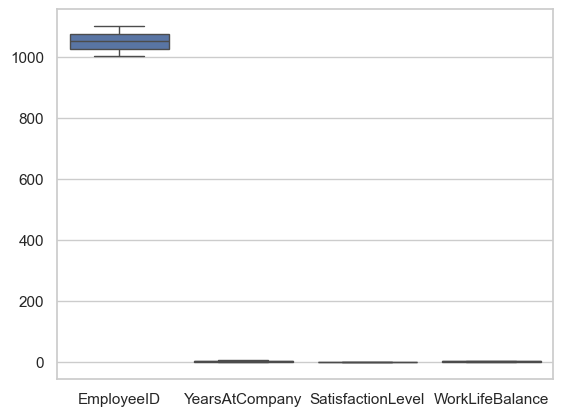

In [22]:
sns.boxplot(data=df)

In [17]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# Predict on the test set
y_pred = model.predict(X_test)


In [26]:
#step 4
error= y_pred-y_test
error

83   -0.019995
53   -0.009995
70   -0.015004
45   -0.000010
44   -0.008003
39    0.019999
22   -0.000004
80   -0.019990
10    0.014996
0    -0.020014
18    0.015001
30   -0.010014
73   -0.019998
33    0.014999
90    0.009986
4     0.035003
76   -0.014978
77   -0.028887
12   -0.014992
31   -0.014983
Name: SatisfactionLevel, dtype: float64

In [28]:
# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
me= model.intercept_
mc=model.coef_
# Print metrics
print(f"Model Intercept: {me}")
print(f"Model Coefficients: {mc}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")

Model Intercept: -3695303751.8975205
Model Coefficients: [-3.83904118e+05  3.83904225e+05  8.51475934e+09  1.40850043e+10
  1.37282770e+10  1.50817474e+10 -4.84755814e+09  6.56775586e+09
  3.69453594e+09 -1.00329732e+10 -5.32433686e+08  3.69530375e+09
  3.69530375e+09  3.69453594e+09 -4.81791997e+09 -4.81791997e+09
  3.69491985e+09  9.96359197e+08  9.96359197e+08  9.96359197e+08
  3.69530375e+09 -1.00329732e+10 -3.43108483e+09 -3.43108483e+09
 -3.43108483e+09  9.96743101e+08 -3.38932586e-02 -3.22255647e-02
  3.69491985e+09  3.69491985e+09 -5.32049782e+08 -3.43146874e+09
 -3.43146874e+09  1.15171229e+06  9.07491167e+09 -1.13864436e+10
 -6.60188837e+09]
R² Score: 0.973
Mean Squared Error (MSE): 0.00030


Using a hypothetical HR dataset, this project achieves 97% model accuracy in predicting employee satisfaction at Google.
